## // KNearest neighbor classification //

#Importing necessary libraries for data preprocessing

In [1]:
import pandas as pd #For reading the dataset and to perform framing functions if needed
import numpy as np  #linear algebra function
import matplotlib.pyplot as plt #for visualizing the data
import seaborn as sns #for data distribution

#Importing the dataset
I have used a 'sample gene dataset' to perform this KNN classiication

In [2]:
#---> Replace the path name for your path name
gene=pd.read_csv('C:/Users/ADMIN/Documents/Data science algorithms/KNN_sample_gene.csv')

#Analysing and processing the dataset

In [3]:
gene.head() #---> First 5 rows

,Gene1,Gene2,CancerPresent
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
gene.describe()

,Gene1,Gene2,CancerPresent
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [5]:
gene.shape

(3000, 3)

In [6]:
gene.isnull().sum()

Gene1            0
Gene2            0
CancerPresent    0
dtype: int64

<Axes: xlabel='CancerPresent', ylabel='count'>

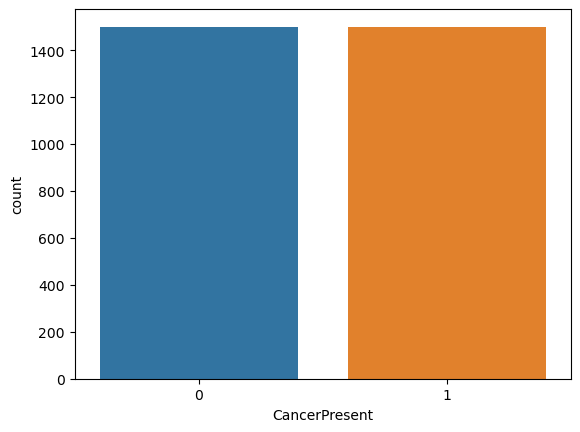

In [7]:
sns.countplot(x='CancerPresent',data=gene)

<Axes: >

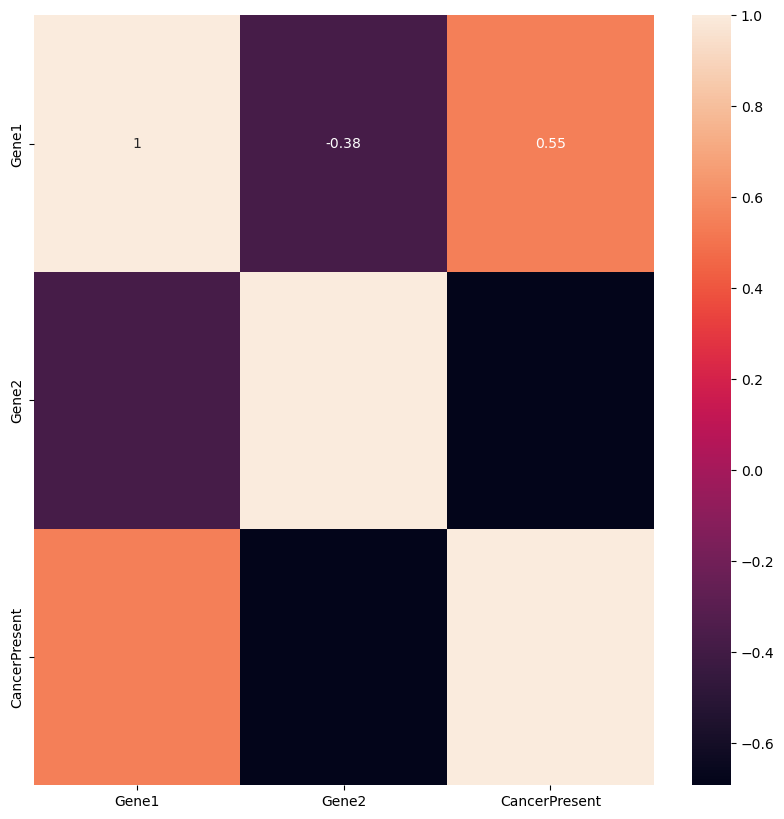

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(gene.corr(numeric_only=True),annot=True)

In [9]:
x=gene.iloc[:,:2]
x.head()

,Gene1,Gene2
0,4.3,3.9
1,2.5,6.3
2,5.7,3.9
3,6.1,6.2
4,7.4,3.4


In [10]:
y=gene.CancerPresent
y.head()

0    1
1    0
2    1
3    0
4    1
Name: CancerPresent, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit(x_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()

In [15]:
para={'n_neighbors':np.arange(1,31)}

In [16]:
knn_model=GridSearchCV(knn,para,cv=10,scoring='accuracy')
knn_model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='accuracy')

In [17]:
knn_model.best_params_

{'n_neighbors': 21}

In [18]:
output=knn_model.predict(x_train)
output

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
report=classification_report(y_train,output)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.94      0.94      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [21]:
matrix=confusion_matrix(y_train,output)
matrix

array([[ 960,   70],
       [  68, 1002]], dtype=int64)

#for our own predictions, we can try to input our values

In [22]:
gene1=float(input("Enter the value of Gene 1:"))
gene2=float(input("Enter the value of Gene 2:"))
input=[gene1,gene2]
print("Your inputs are: ",input)

Enter the value of Gene 1: 4.3
Enter the value of Gene 2: 3.9


Your inputs are:  [4.3, 3.9]


In [23]:
result=knn_model.predict([input])
print("The presence of cancer is False[0]/True[1]: ",result)

The presence of cancer is False[0]/True[1]:  [1]


#Similarly, you can use your own inputs for this pretrained model for your outcomes (Accuracy of this model is 93%)